In [5]:
from Bio import SeqIO
import re
from os import listdir
from os.path import isfile, join

def read_sites_data(fname):
    file2positions = {}
    all_pos = 0
    with open(fname) as f:
        f.readline()
        for line in f:
            s = line.strip().split()
            name, pos, degree = s[0], int(s[3]), float(s[7]) 

            if not name in file2positions:
                file2positions[name] = {}
            file2positions[name][pos] = degree
            all_pos += 1
    print(all_pos)
    return file2positions

def get_all_A_pos_for_transcript(fname):    
    name2as = {}
    name2len = {}
    name2unred = {}
    seqs = SeqIO.parse(fname, "fasta")
    for seq in seqs:
        name = str(seq.id)
        s = str(seq.seq)
        co = [m.start()+1 for m in re.finditer('A', s)]
        name2as[name] = co
        name2len[name] = len(s)
    return name2as, name2unred, name2len

def read_RNA_sec_structure_coverage(dirname):
    mypath = dirname
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

    name2cov = {}
    k = 1
    for fi in onlyfiles:
        if k%1000 == 0: print(k)
        with open(join(mypath, fi)) as f:
            name = fi.split(".")[0]
            cov = [0] * name2len[name]
            for line in f:
                s = line.strip().split()
                begin, end, score = int(s[1]), int(s[2]), float(s[4])
                for i in range(begin, end):
                    cov[i] = min(cov[i], score)
            name2cov[name] = cov
        k += 1
    return name2cov

In [6]:
def count_fraction_of_As_in_structured(name2as, name2cov, z_threshold):
    all_covered_nums = []
    all_A_nums = []
    for name in name2as:
        As = name2as[name]
        cov = name2cov[name]
        covered_num = sum([1 if cov[pos-1] < z_threshold else 0 for pos in As])
        all_covered_nums.append(covered_num)
        all_A_nums.append(len(As))
    return(sum(all_covered_nums)/sum(all_A_nums)) 

In [7]:
names = ["bim", "squ", "sep", "nau", "apl", "oct"]
trs = [-2 - i*0.5 for i in range(10)]
fractions = {}

for name in names:
    name2as, name2unred, name2len = get_all_A_pos_for_transcript("orfs_" + name + "_plus.fa")
    name2cov = read_RNA_sec_structure_coverage(name)
    fractions[name] = []
    for z in trs:
        fr = count_fraction_of_As_in_structured(name2as, name2cov, z)
        fractions[name].append(fr)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


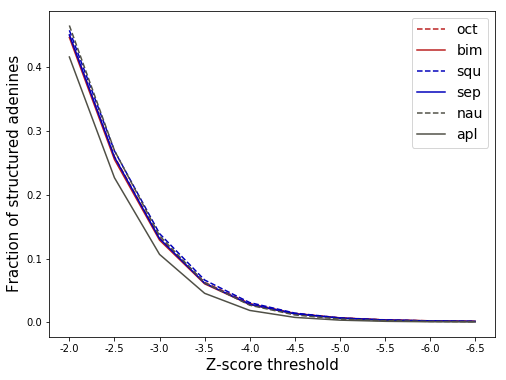

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import itertools

width, height = 8, 6
mpl.rcParams['figure.figsize'] = [width, height]

colours = ["#BB2020", "#BB2020", "#0000BB", "#0000BB", "#505046", "#505046"]
style = itertools.cycle(["dashed", "solid"])

for i,name in enumerate(["oct", "bim", "squ", "sep", "nau", "apl"]):
    plt.plot([-x for x in trs], fractions[name], color=colours[i], ls = next(style), linewidth=1.5)

ax=plt.gca()
ax.set_xticks([-x for x in trs])
ax.set_xticklabels(trs)
plt.legend(["oct", "bim", "squ", "sep", "nau", "apl"], fontsize=14) 
plt.xlabel("Z-score threshold", size=15)
plt.ylabel("Fraction of structured adenines", size=15)
plt.savefig("Fig3.eps", format="eps")
plt.savefig("species_diff.pdf", format="pdf")
plt.show()